In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Import data
# CSV_FILE = 'static/df_non_temporal_imputed1.csv'
CSV_FILE = 'static/df_non_temporal.csv'
# CSV_FILE = 'static/df_non_temporal.csv'
df = pd.read_csv(CSV_FILE)
print(df.head())

   Unnamed: 0       id        date  mood_class  average_mood  \
0           0  AS14.01  2014-03-26           2      0.568421   
1           1  AS14.01  2014-03-27           3      0.631579   
2           2  AS14.01  2014-03-28           1      0.536842   
3           3  AS14.01  2014-03-29           5      0.789474   
4           4  AS14.01  2014-03-30           4      0.710526   

   last_5day_average_mood  last_5day_average_arousal  \
0                0.507181                   0.725131   
1                0.528725                   0.693717   
2                0.561041                   0.662304   
3                0.539497                   0.599476   
4                0.647217                   0.552356   

   last_5day_average_valence  last_5day_average_activity  last_5day_total_sms  \
0                   0.449915                    0.280123             0.068966   
1                   0.490662                    0.265258             0.068966   
2                   0.521222       

MSE:  0.009429734504475446 r_score:  0.31082931031883787 MAE:  0.06784001736549636
MSE:  0.009375546040782369 r_score:  0.3147896658175422 MAE:  0.06857944766860123


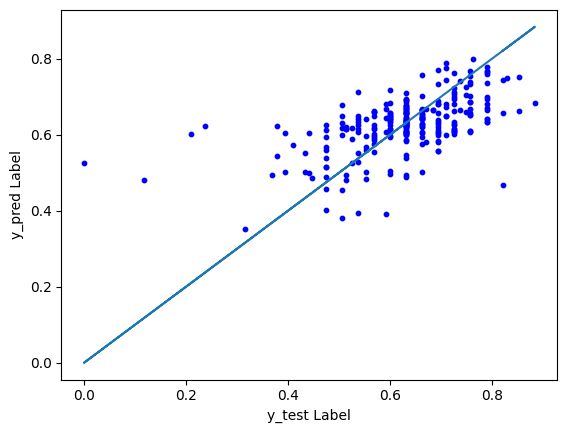

In [27]:
from sklearn.metrics import r2_score
#Split data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

X = df.iloc[:, np.arange(5,len(df.columns)).tolist()]
t = df['average_mood']

X_train, X_test, y_train, y_test = train_test_split(X, t, test_size = 0.25, random_state = 32)

# parameters = {
#     'n_estimators': [100, 150, 200, 250, 300],
#     'max_depth': [1,2,3,4,5],
# }
# regr = RandomForestRegressor(random_state=0)
#
# clf = GridSearchCV(regr, parameters)
# clf.fit(X_train, y_train)


rf = RandomForestRegressor(max_depth=2, n_estimators=300, random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
r_score  = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
print("MSE: ", MSE,"r_score: ", r_score, "MAE: ", MAE)

print("=="*30)
rf_base = RandomForestRegressor(random_state=0)
rf_base.fit(X_train, y_train)
y_pred = rf_base.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
r_score  = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
print("MSE: ", MSE,"r_score: ", r_score, "MAE: ", MAE)

plt.scatter(y_test, y_pred, color='blue', label='Data Points', s=10)
plt.ylabel('y_pred Label')
plt.xlabel('y_test Label')
plt.plot(y_test, y_test)

MSE:  0.012466740004871513 r_score:  0.1961134858408763 MAE:  0.07865395169519483
MSE:  0.01181858321045259 r_score:  0.23790825383077396 MAE:  0.07720862517510511


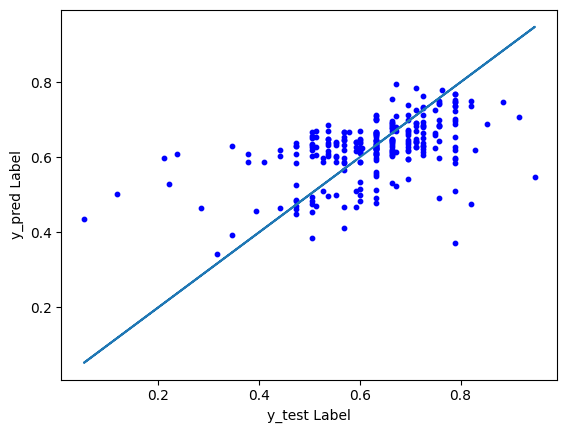

In [32]:
from sklearn.metrics import r2_score
#Split data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

X = df.iloc[:, np.arange(5,len(df.columns)).tolist()]
t = df['average_mood']

X_train, X_test, y_train, y_test = train_test_split(X, t, test_size = 0.25, random_state = 12)

# parameters = {
#     'n_estimators': [100, 150, 200, 250, 300],
#     'max_depth': [1,2,3,4,5],
# }
# regr = RandomForestRegressor(random_state=0)
#
# clf = GridSearchCV(regr, parameters)
# clf.fit(X_train, y_train)


rf = RandomForestRegressor(max_depth=2, n_estimators=500, random_state=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
r_score  = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
print("MSE: ", MSE,"r_score: ", r_score, "MAE: ", MAE)

print("=="*30)
rf_base = RandomForestRegressor(random_state=100)
rf_base.fit(X_train, y_train)
y_pred = rf_base.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
r_score  = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
print("MSE: ", MSE,"r_score: ", r_score, "MAE: ", MAE)

plt.scatter(y_test, y_pred, color='blue', label='Data Points', s=10)
plt.ylabel('y_pred Label')
plt.xlabel('y_test Label')
plt.plot(y_test, y_test)

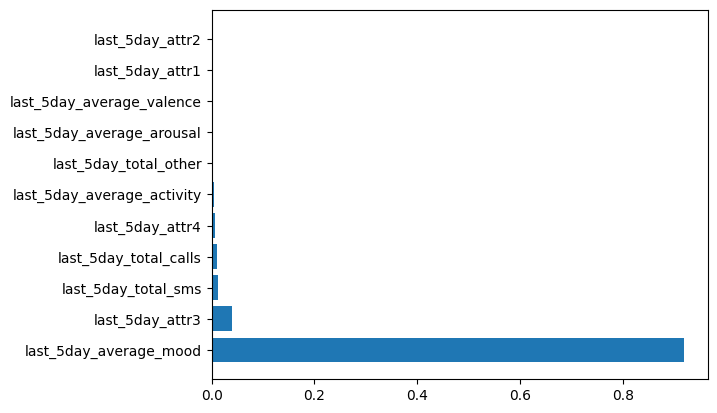

In [8]:
#Feature importance
feature_importance = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance',ascending=False)

fig = plt.figure()
plt.barh(feature_importance.index, feature_importance.importance)
# If you want to define your own labels,
# change indices to a list of labels on the following line.
#plt.yticks(range(X.shape[1]), indices)
#plt.ylim([-1, X.shape[1]])
plt.show()

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score

X = df.iloc[:, np.arange(5,len(df.columns)).tolist()]
y = df['mood_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 32)

# rf = RandomForestClassifier(n_estimators = 100, random_state = 32)
#
# param_grid = {
#     'n_estimators': [200, 300, 500],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [4,5,6,7,8],
#     'criterion' :['gini', 'entropy']
# }
#
# CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
# CV_rfc.fit(X_train, y_train)
# CV_rfc.best_params_

rfc=RandomForestClassifier(random_state=32, max_features='sqrt',
                           n_estimators= 500, max_depth=6, criterion='entropy')
rfc.fit(X_train, y_train)
y_pred=rfc.predict(X_test)
confusion_hard = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
#
rfc_base=RandomForestClassifier(random_state=42)
rfc_base.fit(X_train, y_train)
y_pred=rfc_base.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.51      0.60      0.55        52
           2       0.38      0.18      0.24        45
           3       0.53      0.29      0.38        55
           4       0.23      0.40      0.29        53
           5       0.53      0.55      0.54        58

    accuracy                           0.41       263
   macro avg       0.44      0.40      0.40       263
weighted avg       0.44      0.41      0.41       263

              precision    recall  f1-score   support

           1       0.51      0.52      0.51        52
           2       0.27      0.18      0.21        45
           3       0.46      0.33      0.38        55
           4       0.26      0.38      0.31        53
           5       0.48      0.52      0.50        58

    accuracy                           0.39       263
   macro avg       0.39      0.38      0.38       263
weighted avg       0.40      0.39      0.39       263



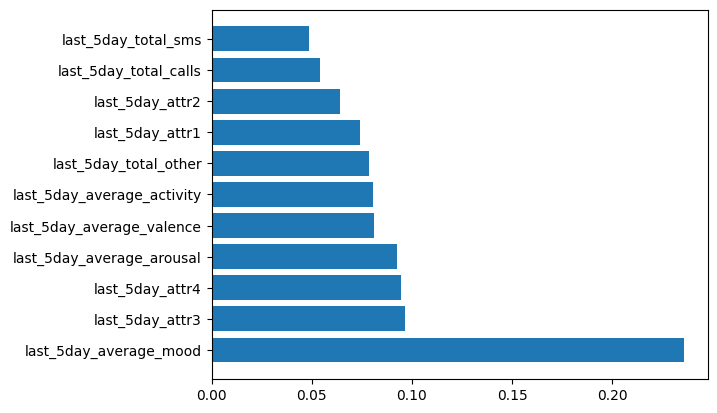

In [10]:
#Feature importance
feature_importance = pd.DataFrame(rfc.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance',ascending=False)

fig = plt.figure()
plt.barh(feature_importance.index, feature_importance.importance)
# If you want to define your own labels,
# change indices to a list of labels on the following line.
#plt.yticks(range(X.shape[1]), indices)
#plt.ylim([-1, X.shape[1]])
plt.show()